In [5]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.datasets import load_iris

# Load the dataset
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Introduce missing values
np.random.seed(42)
missing_mask = np.random.rand(*iris_df.shape) < 0.1
iris_missing = iris_df.copy()
iris_missing[missing_mask] = np.nan

## Original Data with Missing Values

We can visualize the missing values in our data using the following plot:


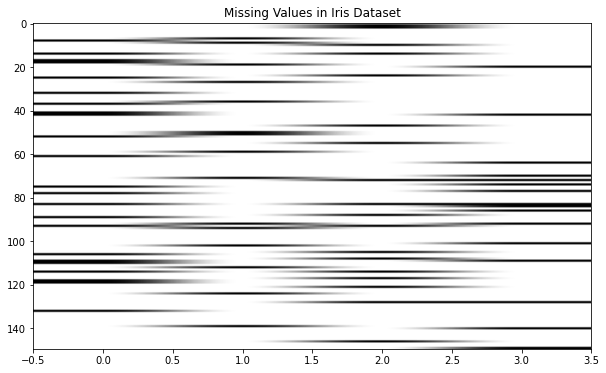

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,NaN,0.2
2,4.7,3.2,NaN,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
# Visualize missing data
plt.figure(figsize=(10,6))
plt.title("Missing Values in Iris Dataset")
plt.imshow(~iris_missing.isnull(), aspect='auto', cmap='gray')
plt.show()

# Display the first 5 rows with missing values
iris_missing.head()


In [8]:
iris_missing.isna().sum()

sepal length (cm)    23
sepal width (cm)     15
petal length (cm)    18
petal width (cm)     16
dtype: int64

## Imputation using SimpleImputer

SimpleImputer fills missing values with a specified strategy such as mean, median, or most frequent value of the column.



In [10]:
# Simple Imputer
simple_imputer = SimpleImputer(strategy='mean')
iris_simple_imputed = simple_imputer.fit_transform(iris_missing)
iris_simple_imputed_df = pd.DataFrame(iris_simple_imputed, columns=iris.feature_names)

# Display the first 5 rows after Simple Imputation
iris_simple_imputed_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.400000,0.2
1,4.9,3.0,3.737879,0.2
2,4.7,3.2,3.737879,0.2
3,4.6,3.1,1.500000,0.2
4,5.0,3.6,1.400000,0.2


## Imputation using KNNImputer

KNNImputer fills missing values using the mean value from `n_neighbors` nearest neighbors found in the training set.


In [9]:
# KNN Imputer
knn_imputer = KNNImputer(n_neighbors=5)
iris_knn_imputed = knn_imputer.fit_transform(iris_missing)
iris_knn_imputed_df = pd.DataFrame(iris_knn_imputed, columns=iris.feature_names)

# Display the first 5 rows after KNN Imputation
iris_knn_imputed_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.5,0.2
2,4.7,3.2,1.5,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Imputation using IterativeImputer

IterativeImputer fills missing values by modeling each feature with missing values as a function of other features in a round-robin fashion.


In [11]:
# Iterative Imputer
iterative_imputer = IterativeImputer(random_state=42)
iris_iterative_imputed = iterative_imputer.fit_transform(iris_missing)
iris_iterative_imputed_df = pd.DataFrame(iris_iterative_imputed, columns=iris.feature_names)

# Display the first 5 rows after Iterative Imputation
iris_iterative_imputed_df.head()


/user/nocampo/home/miniconda3/envs/phd-corpora/lib/python3.9/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.400000,0.2
1,4.9,3.0,1.653994,0.2
2,4.7,3.2,1.361339,0.2
3,4.6,3.1,1.500000,0.2
4,5.0,3.6,1.400000,0.2
